

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації

Приблизний час виконання: **90** хвилин


# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#data_acquisition">Завантаження даних</a>
    <li><a href="#identify_handle_missing_values">Виявлення та обробка відсутніх значень</a>
    <li><a href="#data_standardization">Стандартизація даних</a></li>
    <li><a href="#data_normalization">Нормалізація даних (центрування/масштабування)</a></li>
    <li><a href="#binning">Групування даних</a></li>
    <li><a href="#indicator">Індикаторні змінні</a></li>
</ul>
    
<h3>Завдання, що оцінюються</h3>
<ul>
    <li><a href="#task1">завдання 1</a></li>
    <li><a href="#task2">завдання 2</a></li>
    <li><a href="#task3">завдання 3</a></li>
    <li><a href="#task4">завдання 4</a></li>
    <li><a href="#task5">завдання 5</a></li>
    <li><a href="#task6">додаткове завдання </a></li>

</ul>
    
</div>

<hr>


<a name="data_acquisition"></a>
## <h2>Завантаження даних з файлу або за URL</h2>


<h3>Джерело даних</h3>
<p>
Існують різні формати для набору даних: .csv, .json, .xlsx  etc. Набір даних можна зберігати в різних місцях: на вашій локальній машині або онлайн.<br>

У нашому випадку набір даних "Automobile Dataset" є онлайн-джерелом у форматі CSV (значення, розділені комами).
<ul>
    <li>Джерело даних: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Тип даних: csv</li>
</ul>
</p>



<h3>Імпорт бібліотек</h3>

Бібліотека Pandas Library — це корисний інструмент, який дозволяє читати різні набори даних у датафрейм.

In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

<p>
Використаємо функцію <code>pandas.read_csv()</code> для читання csv файлу. У дужках поміщаємо шлях до файлу разом із лапками, щоб pandas читала файл у датафрейм із цієї адреси. Шляхом до файлу може бути URL-адреса або адреса локального файлу. Адресу датасету зручно записати до змінної "filename". <br>

Ви також можете призначити набір даних будь-якій створеній змінній.
</p>

<h3>Завантаження даних з файлу на Google-диску, якщо використовуєте Google Colaboratory</h3>

Якщо ви скачали датасет на свій диск, то для доступу до файлу спочатку потрібно підключити Google Диск до середовища виконання. Підказку як це зробити дивіться тут <a href="https://colab.research.google.com/notebooks/io.ipynb?hl=ua#scrollTo=u22w3BFiOveA">https://colab.research.google.com/notebooks/io.ipynb</a>.

Ви можете лише переглядати, записувати й переміщувати файли.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = "/content/drive/My Drive/auto.csv" # коренева папка вашого диску
filename = "/content/drive/My Drive/data/auto.csv" # не коренева папка вашого диску

<h3>Завантаження даних з файлу на локальному комп'ютері, якщо використовуєте Jupyter Notebook</h3>

Якщо ви скачали датасет на локальний комп'ютер і розмістили там же, де і блокнот, тоді шлях до нього вказуйте так:

In [ ]:
filename = "auto.csv"



<h3>Завантаження даних за URL</h3>

Потрібний нам датасет зберігається як IBM Cloud object. Запишемо URL датасету до змінної "filename".


In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

<h3>Читання даних</h3>

Використовуємо метод <code>read_csv()</code> з Pandas для завантаження даних. Оскільки дані не містять заголовків, можемо додати аргумент <code>headers = None</code> в метод <code>read_csv()</code> щоб pandas не встановлювала перший рядок автоматично як заголовок.


In [ ]:
df = pd.read_csv(filename, header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'auto.csv'

<h2>Для чого роблять попередню обробку даних?</h2>

Попередня обробка даних - це процес перетворення даних з їх початкового вигляду у вигляд, зручний для аналізу.

Після прочитання набору даних можемо використати метод <code>dataframe.head(n)</code>, щоб перевірити n верхніх рядків датафрейму, де n — ціле число. На відміну від <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> покаже вам n нижніх рядків.

In [ ]:
df.head()

<p>
Подивіться на набір даних. Pandas автоматично встановлює заголовок із цілим числом, починаючи з 0.
</p>
<p>
Щоб краще описати наші дані, можемо додати заголовок. Ця інформація доступна за адресою:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>
<p>
Отже, ми повинні додати заголовки вручну.
</p>
<p>
Спочатку створюємо список 'headers', який містить усі назви стовпців по порядку.
Потім використовуємо <code>dataframe.columns = headers</code> для заміни заголовків створеним нами списком.
</p>

Створюємо Python list 'headers', що містить заголовки стовпчиків - назви ознак.


In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Замінюємо заголовки та повторно перевіряємо наш датафрейм:


In [ ]:
df.columns = headers
df.head(10)

У відображеному фрагменті бачимо кілька знаків питання; це відсутні значення, які можуть перешкодити подальшому аналізу.

<b>Що робити з відсутніми значеннями?</b>

<ol>
    <li>Виявити всі відсутні значення</li>
    <li>Замінити значення або видалити спостереження чи ознаки</li>
    <li>Скоригувати формат даних</li>
</ol>


<a name="identify_handle_missing_values"></a>
## <h2>Виявлення та обробка відсутніх значень</h2>




<h3 id="identify_missing_values">Виявлення відсутніх значень</h3>

Використовуємо метод <b>info()</b> для відображення основної інформації про датафрейм.


In [ ]:
df.info()

 Використовуємо метод <b>describe()</b> для відображення більш детальної інформації про датафрейм.


In [ ]:
df.describe()

,Populatiion
count,2.160000e+02
mean,3.432256e+07
std,1.347600e+08
min,1.109700e+04
25%,7.900265e+05
50%,6.221590e+06
75%,2.350337e+07
max,1.378665e+09


<p>
Бачимо статистичний підсумок усіх стовпців із числовим типом (int, float).<br>

Наприклад, ознака 'symboling' має 205 одиниць, середнє значення цього стовпця становить 0.83, стандартне відхилення — 1.25, мінімальне значення — -2, 25-й процентиль — 0, 50-й процентиль — 1, 75-й процентиль — 2 і максимальне значення 3.
<br><br>

Але що, якщо ми також хочемо перевірити всі стовпці, включаючи ті, які мають тип об’єкт?
<br>
Можна додати аргумент <code>include = "all"</code> у дужку.

</p>

In [ ]:
df.describe(include = "all")

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,190,2.160000e+02,205,217
unique,217,7,190,NaN,202,213
top,Afghanistan,Europe & Central Asia,"561,7787463",NaN,"6318,241",460
freq,1,58,1,NaN,2,3
mean,NaN,NaN,NaN,3.432256e+07,NaN,NaN
std,NaN,NaN,NaN,1.347600e+08,NaN,NaN
min,NaN,NaN,NaN,1.109700e+04,NaN,NaN
25%,NaN,NaN,NaN,7.900265e+05,NaN,NaN
50%,NaN,NaN,NaN,6.221590e+06,NaN,NaN
75%,NaN,NaN,NaN,2.350337e+07,NaN,NaN


<p>
Тепер він надає статистичний підсумок усіх стовпців, включаючи атрибути типу object, і можемо побачити скільки там унікальних значень, яке з них є верхнім значенням і частоту верхнього значення в стовпцях типу object.<br>

Деякі значення в таблиці відображаються як "NaN". Це тому, що ці числа недоступні для певного типу стовпця.<br>
</p>

<h4>Заміна "?" на NaN</h4>

В датасеті про автомобілі відсутні дані позначені знаком "?".
Ми замінимо "?" на NaN (Not a Number), Python за замовчуванням позначає відсутні дані саме так для пришвидшення обчислень та зручності. Використовуємо функцію:
 <pre>.replace(A, B, inplace = True) </pre>

для заміни A на B.


In [ ]:
import numpy as np

# заміна "?" на NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

Інколи потрібно виконати заміну не всього значення, а лише його частини. Наприклад, замінити коми на крапки в числах, щоб потім змінити тип даних на числовий. Тоді спочатку змінюємо тип на строковий, виконуємо заміну ком на крапки, і знову міняємо тип на числовий:
 <pre>.astype("str").str.replace(',', '.').astype("float") </pre>


<h4>Оцінка відсутніх даних</h4>

Відсутні значення конвертуються за замовчуванням. Існує два методи для виявлення відсутніх даних:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>

Результатом є логічне значення, яке вказує, чи значення, яке передається в аргумент, насправді є відсутніми даними.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

"True" означає відсутнє значення, а "False" означає, що значення присутнє в наборі даних.

<h4>Підрахунок відсутніх значень в кожному стовпчику</h4>
<p>
Використовуючи цикл <code>for</code> у Python, ми можемо швидко визначити кількість пропущених значень у кожному стовпці. У тілі циклу <code>for</code> метод <code>.value_counts()</code> підраховує кількість значень "True".    
</p>


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Виходячи з наведеного вище підсумку, кожен стовпець містить 205 рядків даних і сім стовпців містять відсутні дані:
<ol>
    <li>"normalized-losses": 41 відсутнє значення</li>
    <li>"num-of-doors": 2 відсутніх значення</li>
    <li>"bore": 4 відсутніх значення</li>
    <li>"stroke" : 4 відсутніх значення</li>
    <li>"horsepower": 2 відсутніх значення</li>
    <li>"peak-rpm": 2 відсутніх значення</li>
    <li>"price": 4 відсутніх значення</li>
</ol>


<h3 id="deal_missing_values">Обробка відсутніх значень</h3>

<b>Як обробити відсутні значення?</b>

<ol>
    <li>Видалити дані<br>
        a. Видалити весь рядок (спостереження)<br>
        b. Видалити весь стовпчик (ознаку)
    </li>
    <li>Замінити дані<br>
        a. Замінити середнім значенням<br>
        b. Замінити модою (значенням, що зустрічається найчастіше)<br>
        c. Замінити значенням, порахованим за якоюсь іншою фунцією
    </li>
</ol>


Весь стовпчик слід видаляти, лише якщо більшість записів у ньому відсутні. У нашому наборі даних жоден зі стовпців не є настільки порожнім, щоб повністю його видалити.
Ми маємо певну свободу у виборі методу заміни даних; однак деякі методи можуть здатися більш розумними, ніж інші. Застосуємо наступні методи до вказаних стовпців:

<b>Заміна середнім значенням:</b>
<ul>
    <li>'normalized-losses': 41 відсутнє значення, замінимо їх середнім значенням</li>
    <li>'stroke': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'bore': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'horsepower': 2 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'peak-rpm': 2 відсутніх значення, замінимо їх середнім значенням</li>
</ul>

<b>Заміна модою:</b>
<ul>
    <li>'num-of-doors': 2 відсутніх значення, замінимо їх значенням "four".
        <ul>
            <li>Причина: 84% седанів - чотиридверні. Оскільки чотири двері найчастіше зустрічаються, це найбільш ймовірне значення</li>
        </ul>
    </li>
</ul>

<b>Видалити весь рядок:</b>
<ul>
    <li>'price': 4 відсутніх значення, просто видалимо весь рядок
        <ul>
            <li>Причина: ціна - це те, що ми хочемо передбачити. Будь-яке введення даних без інформації про ціну не можна використовувати для прогнозу; тому будь-який рядок без даних про ціну нам не корисний</li>
        </ul>
    </li>
</ul>


<h4>Обчислення середнього значення для ознаки 'normalized-losses'  </h4>


In [ ]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

<h4>Заміна "NaN" на середнє значення ознаки 'normalized-losses'</h4>


In [ ]:
# df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)
df.replace({'normalized-losses':np.nan}, avg_norm_loss, inplace=True)

<h4>Обчислення середнього значення для ознаки 'bore'</h4>


In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

<h4>Заміна "NaN" на середнє значення ознаки 'bore'</h4>


In [ ]:
# df['bore'].replace(np.nan, avg_bore, inplace=True)
df.replace({'bore':np.nan}, avg_bore, inplace=True)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #1: </h2>

<p>Спираючись на попередні приклади, замініть NaN для ознаки 'stroke' середніми значеннями.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Розрахунок середнього значення для ознаки "stroke"
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Заміна NaN середнім значенням ознаки "stroke"
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>



<h4>Обчислення середнього значення для ознаки 'horsepower'</h4>


In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

<h4>Заміна "NaN" на середнє значення ознаки 'horsepower'</h4>


In [ ]:
# df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df.replace({'horsepower':np.nan}, avg_horsepower, inplace=True)

<h4>Обчислення середнього значення для ознаки 'peak-rpm'</h4>


In [ ]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

<h4>Заміна "NaN" на середнє значення ознаки 'peak-rpm'</h4>


In [ ]:
# df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df.replace({'peak-rpm':np.nan}, avg_peakrpm, inplace=True)

<h4>Заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті</h4>


Щоб побачити, які значення присутні в певному стовпці, можемо використати метод <code>.value_counts()</code>:

In [ ]:
df['num-of-doors'].value_counts()

Бачимо, що чотири двері є найпоширенішим типом. Також можемо використовувати метод <code>.idxmax()</code>, щоб автоматично обчислити найпоширеніший тип:


In [ ]:
df['num-of-doors'].value_counts().idxmax()

Процедура заміни дуже схожа на ту, яку робили раніше:


In [ ]:
# заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті
# df['num-of-doors'].replace(np.nan, 'four', inplace=True)
df.replace({'num-of-doors':np.nan}, df['num-of-doors'].value_counts().idxmax(), inplace=True)

<h4>Видалення рядків, де відсутні значення 'price'</h4>


Нарешті, видалимо всі рядки, які не містять даних про ціни:


In [ ]:
# просто видаляємо весь рядок з NaN в "price"
df.dropna(subset=['price'], axis=0, inplace=True)

# оновлюємо індекси, тому що видалили два рядки
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

Тепер маємо датасет без пропущених значень.


<h3 id="correct_data_format">Виправлення форматів даних</h3>

<p>Останнім етапом очищення даних є перевірка, що всі дані мають правильний формат (int, float, text або інші).</p>

В Pandas використовуємо:
<p><b>.dtype()</b> щоб перевірити тип даних</p>
<p><b>.astype()</b> щоб змінити тип даних</p>


<h4>Переглянемо типи даних для кожного стовпця</h4>


In [ ]:
df.dtypes

<p>Як бачимо, деякі стовпці мають неправильний тип даних. Числові змінні повинні мати тип 'float' або 'int', а змінні з рядками, наприклад категорії, повинні мати тип 'object'. Наприклад, змінні 'bore' і 'stroke' є числовими значеннями, які описують двигуни, тому ми очікуємо, що вони будуть типу 'float' або 'int'; однак вони відображаються як тип 'object'. Потрібно перетворити типи даних у відповідний формат для кожного стовпця за допомогою методу <code>astype()</code>.</p>


<h4>Перетворення типів даних у правильний формат</h4>


In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Переглянемо типи стовпців після перетворення


In [ ]:
df.dtypes

Тепер нарешті отримали очищений набір даних без пропущених значень з усіма даними у належному форматі.


<a name="data_standardization"></a>
## <h2>Стандартизація даних</h2>

<p>
Дані зазвичай збираються з різних джерел у різних форматах.</p>
    
<b>Що таке стандартизація?</b>
<p>Стандартизація — це процес перетворення даних у загальний формат, що дозволяє досліднику робити значуще порівняння. (Стандартизація даних також є терміном для певного типу нормалізації даних, коли ми віднімаємо середнє значення та ділимо на стандартне відхилення.)
</p>

Приклад:  Перетворення mpg на л/100км.</p>
<p>У нашому наборі даних стовпці споживання палива 'city-mpg' і 'highway-mpg' представлено в одиницях mpg (миль на галон). Припустімо, що розробляємо програму в країні, яка приймає стандарт споживання палива л/100 км.</p>
<p>Потрібно буде застосувати <b>перетворення даних</b>, щоб перетворити милі на галон у л/100 км.</p>    


<p>Формула перетворення одиниць має вигляд:<p>
L/100km = 235 / mpg
<p>Ми можемо виконувати багато математичних операцій безпосередньо в Pandas.</p>


In [ ]:
df.head()

In [ ]:
# перетворюємо mpg на л/100км за допомогою математичної операції (235 ділимо на mpg)
df['city-L/100km'] = 235/df['city-mpg']

# перевіряємо трансформовані дані
df.head()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2: </h2>

<p>Відповідно до прикладу вище, перетворіть милі на галон на л/100 км у стовпці 'highway-mpg' і змініть назву стовпця на 'highway-L/100km'.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# перетворюємо mpg на л/100км за допомогою математичної операції (235 ділимо на mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# змінюємо назву стовпчика з "highway-mpg" на "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# перевіряємо трансформовані дані
df.head()

```
</details>




<a name="data_normalization"></a>
## <h2>Нормалізація даних</h2>

<b>Навіщо нормалізація?</b>
<p>Нормалізація — це процес перетворення значень кількох змінних у подібний діапазон. Типові нормалізації включають масштабування змінної, щоб середнє значення змінної дорівнювало 0, масштабування змінної, щоб дисперсія дорівнювала 1, або масштабування змінної, щоб значення змінної змінювалися в межах від 0 до 1.
</p>

<b>Приклад</b>
<p>Щоб продемонструвати нормалізацію, масштабуємо ознаки 'length', 'width' та 'height'.</p>
<p><b>Ціль:</b> хочемо нормалізувати ці змінні, щоб їхні значення були в діапазоні від 0 до 1</p>
<p><b>Підхід:</b> заміняємо вихідне значення на (первинне значення)/(максимальне значення)</p>


In [ ]:
# заміняємо вихідне значення на (первинне значення)/(максимальне значення)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання #3: </h2>

<p>Спираючись на попередній приклад, нормалізуйте ознаку 'height'.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
df['height'] = df['height']/df['height'].max()

# переглянемо нормалізовані ознаки
df[["length","width","height"]].head()


```
</details>




Бачимо, що нормалізували 'length', 'width' та 'height' в діапазоні [0,1].

<a name="binning"></a>
## <h2>Групування даних</h2>

<b>Навіщо групувати?</b>
<p>
    Групування — це процес перетворення неперервних числових змінних у дискретні категоріальні групи-"bins" для згрупованого аналізу.
</p>

<b>Приклад: </b>
<p>В нашому датасеті 'horsepower' — це змінна з дійсними значенням у діапазоні від 48 до 288 і має 59 унікальних значень. Що, якщо нас цікавить лише різниця в ціні між автомобілями з високою, середньою та малою потужністю (3 типи)? Чи можемо ми зібрати їх у три групи-"bins", щоб спростити аналіз?</p>

<p>Ми використаємо метод pandas <code>cut()</code>, щоб розділити стовпець 'horsepower' на 3 групи.</p>


<h3>Приклад групування даних Pandas</h3>


 Перетворимо дані в правильний формат:


In [ ]:
df['horsepower']=df['horsepower'].astype(int, copy=True)

Давайте побудуємо гістограму 'horsepower', щоб побачити, як виглядає розподіл.

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Нам потрібні 3 групи однакового розміру, тому використовуємо функцію з numpy <code>linspace(start_value, end_value, numbers_generated</code>.</p>
<p>Оскільки хочемо включити мінімальне значення 'horsepower', встановлюємо <code>start_value = min(df['horsepower'])</code>.</p>
<p>Оскільки хочемо включити максимальне значення 'horsepower', встановлюємо <code>end_value = max(df['horsepower'])</code>.</p>
<p>Оскільки будуємо 3 групи однакової довжини, має бути 4 розділювачі, отже <code>numbers_generated = 4</code>.</p>


Створюємо масив груп від мінімального до максимального значення, використовуючи параметри, вказані вище. Значення визначатимуть, коли закінчується одна група і починається інша.

In [ ]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

 Задаємо назви груп:


In [ ]:
group_names = ["Low", "Medium", "High"]

Застосовуємо функцію <code>cut()</code>, щоб визначити, до якої групи належить кожне значення `df['horsepower']`.

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

Подивимося кількість транспортних засобів у кожній групі:


In [ ]:
df['horsepower-binned'].value_counts()

Побудуємо стовпчасту діаграму для порівняння кількості елементів в групах:


In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Уважно подивіться на датафрейм вище. Ви побачите, що в останньому стовпчику наведено групи для 'horsepower' на основі 3 категорій ("Low", "Medium" та "High"). Ми успішно зменшили кількість інтервалів з 59 до 3.
</p>


<h3>Візуалізація груп</h3>
Зазвичай для візуалізації розподілу груп використовується гістограма.

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# будуємо гістограму для ознаки 'horsepower' з кількістю груп bins = 3
plt.pyplot.hist(df['horsepower'], bins = 3)

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Графік вище показує результат групування для ознаки 'horsepower'.

<a name="indicator"></a>
## <h2>Індикаторні змінні (Dummy Variable)</h2>

<b>Що таке індикаторна змінна?</b>
<p>
    Змінна-індикатор (або фіктивна змінна) — це числова змінна, яка використовується для позначення категорій. Їх називають "dummies" (фіктивними), тому що самі числа не мають внутрішнього значення.
</p>

<b>Чому використовуємо змінні-індикатори?</b>
<p>
    Змінні-індикатори потрібні, щоб можна було використовувати категоріальні змінні для регресійного аналізу.
</p>

<b>Приклад</b>
<p>
   Бачимо, що ознака 'fuel-type' має два унікальних значення: "gas" або "diesel". Регресія не розуміє слів, розуміє лише числа. Щоб використовувати цей атрибут у регресійному аналізі, перетворюємо 'fuel-type' на індикаторні змінні.
</p>

<p>
    Ми будемо використовувати метод pandas <b>get_dummies()</b> для призначення числових значень різним категоріям типу палива.
</p>


In [ ]:
df.columns

Отримуємо індикаторні змінні та створюємо з них датафрейм "dummy_variable_1":

In [ ]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

Змінюємо назви стовпців для ясності:


In [ ]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

В датафреймі стовпець 'fuel-type' тепер має значення для "gas" і "diesel" як 0 і 1.

In [ ]:
# об'єднуємо датафрейми "df" та "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# видаляємо вихідну ознаку 'fuel-type' з "df"
df.drop('fuel-type', axis = 1, inplace=True)

In [ ]:
df.head()

Останні два стовпці тепер представляють індикаторні змінні для ознаки 'fuel-type'. Зараз усі вони 0 і 1.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #4: </h2>

<p>Спираючись на попередній приклад, створіть індикаторні змінні для ознаки 'aspiration'</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# отримати індикаторні змінні для aspiration та створити з них датафрейм "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# змінити назви стовпців для ясності
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# показати перші 5 екземплярів даних з датафрейму "dummy_variable_2"
dummy_variable_2.head()


```
</details>




 <div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #5: </h2>

<p>Об’єднайте новий датафрейм із вихідним датафреймом, а потім видаліть ознаку 'aspiration'.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# об'єднати датафрейми
df = pd.concat([df, dummy_variable_2], axis=1)

# видалити оригінальну ознаку "aspiration" з "df"
df.drop('aspiration', axis = 1, inplace=True)


```
</details>




Використайте метод <b>describe()</b> для відображення інформації про датафрейм. Переконайтесь, що вся попередня обробка даних завершена.


In [ ]:
df.describe()

## <h2>Збереження даних</h2>
<p>
Pandas дозволяє нам зберігати набір даних у форматі CSV. Використовуючи метод <b>dataframe.to_csv()</b>, ви можете додати шлях до файлу та назву разом із лапками в дужках.
</p>
<p>
Наприклад, якщо ви хочете зберегти фрейм даних "df" як "auto1.csv", можете використати наведений нижче синтаксис, де <code>index = False</code > означає, що назви рядків не будуть записані.
</p>



In [ ]:
df.to_csv("auto1.csv", index=False)

<h3>Read/Save інших форматів даних</h3>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |

Якщо використовуєте Google Colaboratory, але хочете зберегти файл з даними на локальний комп'ютер, скористайтесь наступною командою

In [ ]:
from google.colab import files

files.download('auto1.csv')

*В теоретичній частині роботи використано елементи курсу "Data Analysis with Python" від IBM Corporation, автор
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>*




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

filename = "/content/drive/MyDrive/Untitled Folder/Data2.csv" # коренева папка вашого диску

# filename = "Data2.csv"

df = pd.read_csv(filename, sep=';', encoding='ISO-8859-1')
df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


,Populatiion
count,2.160000e+02
mean,3.432256e+07
std,1.347600e+08
min,1.109700e+04
25%,7.900265e+05
50%,6.221590e+06
75%,2.350337e+07
max,1.378665e+09


Бачу наступні проблеми в даних:
1. Числові значення для стовпців "GDP per capita", "Area" та "CO2 emission", є типом object замість float
4. Country Name,	Region,	GDP per capita,	CO2, emission,	Area


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1.</b>
<p>
    Для виправлення зроблю наступне (опишіть, що хочете зробити)
    для перетворення в число з плаваючою крапкою, спочатку заміню , на . в рядкувій змінних, потім конвертую тип данних
    
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['GDP per capita'] = df['GDP per capita'].str.replace(',', '.')

df['GDP per capita'] = df['GDP per capita'].astype(float)

df






,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,4124.982390,2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200
4,Andorra,Europe & Central Asia,36988.622030,77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,"4503,076",752610


<b>Проблема 2.</b>
<p>
    Для виправлення зроблю наступне (опишіть, що хочете зробити)
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['CO2 emission'] = df['CO2 emission'].astype(str).str.replace(',', '.').astype(float)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    object 
dtypes: float64(3), object(3)
memory usage: 10.3+ KB


,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610


<b>Проблема 3.</b>
<p>
    Для виправлення зроблю наступне (опишіть, що хочете зробити)
</p>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['Area'] = df['Area'].astype(str).str.replace(',', '.').astype(float)
df = df.round(3)
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.779,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.882,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.405,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.335,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.574,16591390.0,4503.076,752610.0


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Заповнювати пропуски для ознаки такої-то буду таким-то способом, тому що ...
Для трьох ознак "GDP per capita", "Populatiion" та "CO2 emission", буду заповнювати середнім значенням, адже завнювати модою буде не коректно.

In [ ]:
import numpy as np

avg_GDP_per_capita = df['GDP per capita'].mean(axis=0)
df = df.replace({'GDP per capita':np.nan}, avg_GDP_per_capita)
df['GDP per capita']

avg_Populatiion = df['Populatiion'].mean(axis=0)
df = df.replace({'Populatiion':np.nan}, avg_Populatiion)

avg_CO2_emission = df['CO2 emission'].mean(axis=0)
df = df.replace({'CO2 emission':np.nan}, avg_CO2_emission)
missing_values_count  = df[['CO2 emission', 'Populatiion','GDP per capita' ]].isnull().value_counts()


Досліджую структуру даних, чи всі пропуски заповнено


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
missing_values_count
# пропусків в данних не має


CO2 emission  Populatiion  GDP per capita
False         False        False             217
dtype: int64

 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую по формулі такій-то і додам у стовпчик такий-то.


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['population density'] = df['Populatiion']/df['Area']
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,population density
0,Afghanistan,South Asia,561.779000,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982000,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.882000,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745000,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622000,77281.0,462.042000,470.0,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13374.833147,102951.0,165114.116337,350.0,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.405000,4551566.0,165114.116337,6020.0,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.335000,27584213.0,22698.730000,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.574000,16591390.0,4503.076000,752610.0,22.045136


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


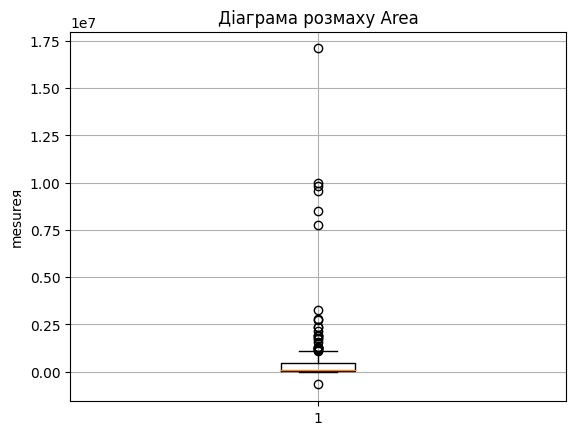

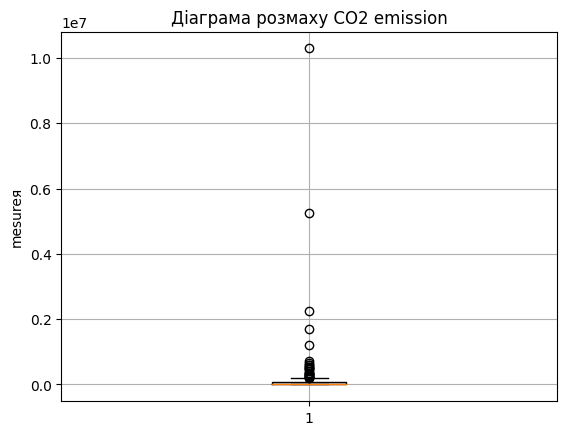

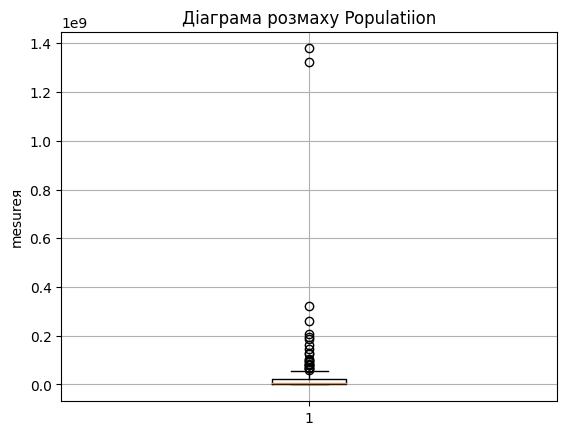

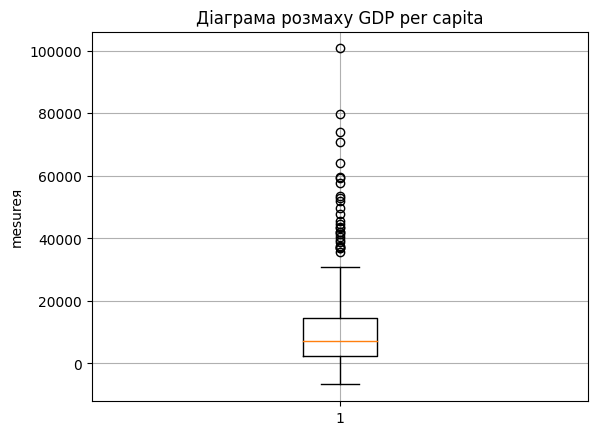

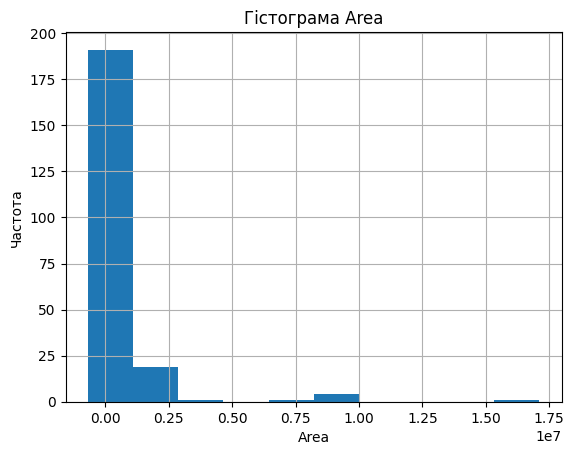

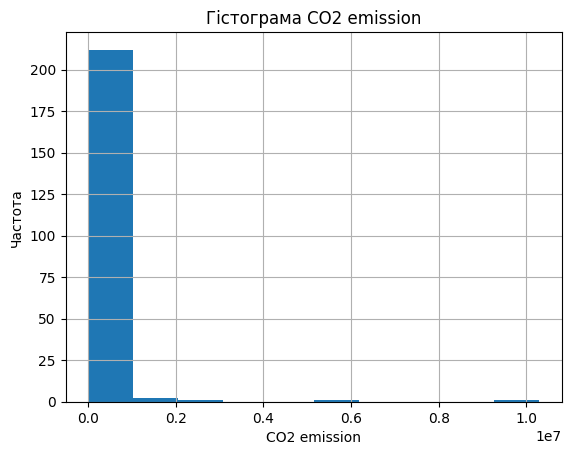

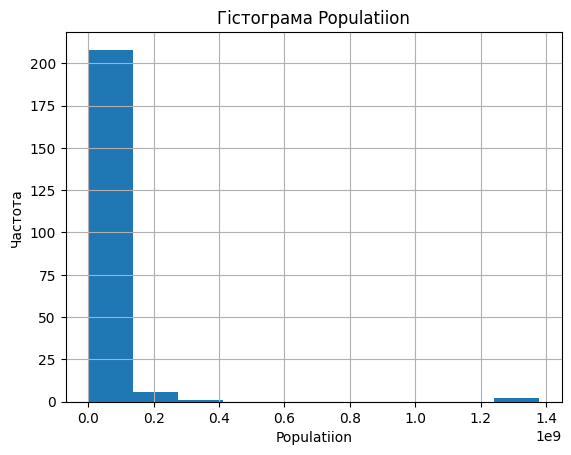

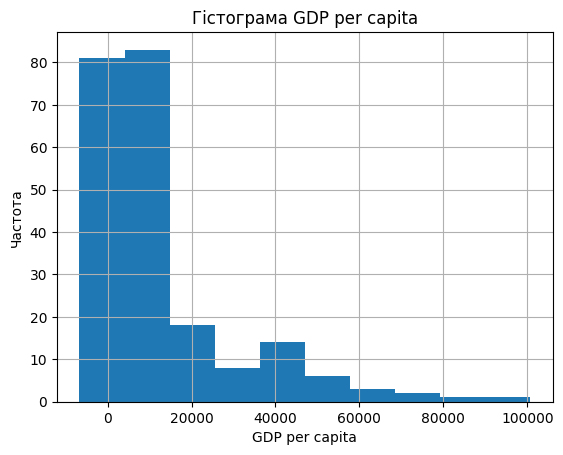

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt


def draw_box_and_whisker(mesure) :
  plt.boxplot(df[mesure])
  plt.title(f'Діаграма розмаху {mesure}')
  plt.ylabel('mesureя')
  plt.grid(True)
  plt.show()

def draw_histogram(mesure):
  plt.hist(df[mesure])
  plt.title(f'Гістограма {mesure}')
  plt.xlabel(f'{mesure}')
  plt.ylabel('Частота')
  plt.grid(True)
  plt.show()

column_names = ['Area', 'CO2 emission', 'Populatiion', 'GDP per capita']

for el in column_names:
  draw_box_and_whisker(el)

for el in column_names:
  draw_histogram(el)

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


Збережіть дані у новий файл 'clean_data2.csv':


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<h2>Виконав студент групи ІП-хх  <br>Прізвище Ім'я</h2>
